In [1]:
# Importing required libraries
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import time

import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# Metrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tqdm import tqdm

In [3]:
# Loading the data
data = pd.read_csv("C:/UMBC/606 Capstone/Data/train/final_dataset.csv")
print("Shape of the Dataset:", data.shape)
data.head(2)

Shape of the Dataset: (10868, 1060)


,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,601905,3905,2816,3832,3345,3242,3650,3201,2965,3205,...,48,48,32,48,48,32,55,68,32,49
1,39755,8337,7249,7186,8663,6844,8420,7589,9291,358,...,68,48,32,48,68,32,67,55,32,48


In [4]:
# Train Test Split
# Using stratifies sampling since the distribution is imbalanced
X_train, X_test, y_train, y_test = train_test_split(data.drop("Class", axis=1), data['Class'], test_size=0.20, random_state=42,
                                                   stratify=data['Class'])

print("Shape of X Train: ", X_train.shape)
print("Shape of y Train: ", y_train.shape)
print("-"*75)
print("Shape of X Test: ", X_test.shape)
print("Shape of y Test: ", y_test.shape)

Shape of X Train:  (8694, 1059)
Shape of y Train:  (8694,)
---------------------------------------------------------------------------
Shape of X Test:  (2174, 1059)
Shape of y Test:  (2174,)


In [5]:
# Scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Modeling
xgb_classifier = XGBClassifier(n_estimators = 800, max_depth = 3, n_jobs = 4)
xgb_classifier.fit(X_train_scaled, y_train)

y_pred = xgb_classifier.predict(X_test_scaled)
y_pred_train = xgb_classifier.predict(X_train_scaled)

print("Accuracy on Training Data: ",accuracy_score(y_train, y_pred_train))
print("Accuracy on Test Data: ",accuracy_score(y_test, y_pred))
print("-"*75)

Accuracy on Training Data:  1.0
Accuracy on Test Data:  0.9921803127874885
---------------------------------------------------------------------------


In [7]:
# Printing Classification Report
levels = ["Ramnit","Lollipop", "Kelihos_ver3", "Vundo", "Simda","Tracur","Kelihos_ver1","Obfuscator.ACY","Gatak"]
print(classification_report(y_test,y_pred,target_names=levels))

                precision    recall  f1-score   support

        Ramnit       0.99      0.99      0.99       308
      Lollipop       0.99      0.99      0.99       496
  Kelihos_ver3       1.00      1.00      1.00       588
         Vundo       0.99      1.00      0.99        95
         Simda       0.88      0.88      0.88         8
        Tracur       0.99      0.98      0.98       150
  Kelihos_ver1       0.99      1.00      0.99        80
Obfuscator.ACY       0.99      0.98      0.98       246
         Gatak       0.99      0.99      0.99       203

      accuracy                           0.99      2174
     macro avg       0.98      0.98      0.98      2174
  weighted avg       0.99      0.99      0.99      2174



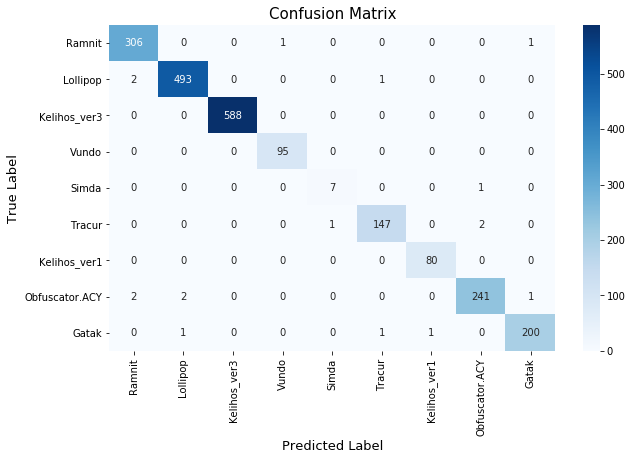

In [8]:
# Displaying the confusion matrix with actual number of instances
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d',
           xticklabels=levels, yticklabels=levels)
plt.xlabel("Predicted Label", fontsize=13)
plt.ylabel("True Label", fontsize=13)
plt.title("Confusion Matrix", fontsize=15)
plt.show()

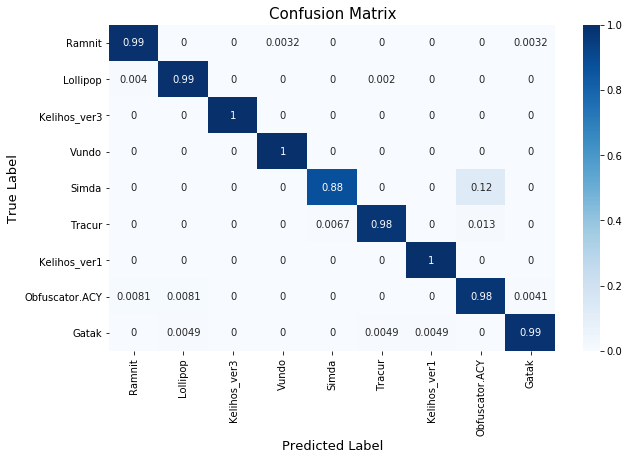

In [9]:
# Displaying normailized Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', #fmt='d',
           xticklabels=levels, yticklabels=levels)
plt.xlabel("Predicted Label", fontsize=13)
plt.ylabel("True Label", fontsize=13)
plt.title("Confusion Matrix", fontsize=15)
plt.show()